# Tarea 01 Métodos Computacionales.
##Gabriel Cataño Sánchez
###CC: 1039474879

In [10]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Campo Eléctrico de un Dipolo.

In [11]:
K = 8.988*10**9
def E_campo(q, r ):
    """
    Magnitud del campo electrico
    """
    global K
  
    return K*q/r**2

In [12]:
def Campo_fuente(rsource, rp) : 
    """
    Parámetros
    ---------
    rsource: numpy array de 2D, con la posicion de la fuente
    rp     : numpy array de 2D, El punto donde se encontrará el campo

    Return
    ----------
    Ex: Componente x del campo electrico
    Ey: Componente y del campo electrico 
    """
  
    Delta_R =  rp - rsource
    MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
    u_R = Delta_R/MagDelta_R
    
    
    q = 1                                                             #Magnitud de la carga
    
    if rsource[0] < 0:
      E1 = E_campo(q,MagDelta_R ) * u_R  
      E1x = E1[0]  
      E1y = E1[1]
      return E1x, E1y

    if rsource[0] > 0:
      E2 = E_campo(-q,MagDelta_R ) * u_R
      E2x = E2[0]
      E2y = E2[1]
      return  E2x, E2y



In [13]:
r_source = {"q": np.array([-1, 0]),"-q": np.array([1,0])} #Posicion de las fuentes
x  = np.linspace(-4.,4.,20)
n1 = 20
y  = np.linspace(-4.,4.,20)
n2 = 20
    
rp = np.zeros((n1*n2,2))
k = 0
for x_ in (x):
    for y_ in (y):
        rp[k] = np.array([x_, y_])
        k=k+1
    
E1 = np.zeros((n1*n2, 2))
E2 = np.zeros((n1*n2,2))


for i in range(0, len(rp)):
    E1[i] = Campo_fuente(r_source["q"], rp[i] )

        
for j in range(0,len(rp)):
    E2[j] = Campo_fuente(r_source["-q"], rp[j])
    

Ex = E1[:,0] + E2[:,0]                             #Campo eléctrico total componente x
Ey = E1[:,1] + E2[:,1]                             #Campo eléctrico total componente y

Text(0.5, 1.0, '$Campo$ $Eléctrico$ $de$ $un$ $Dipolo$')

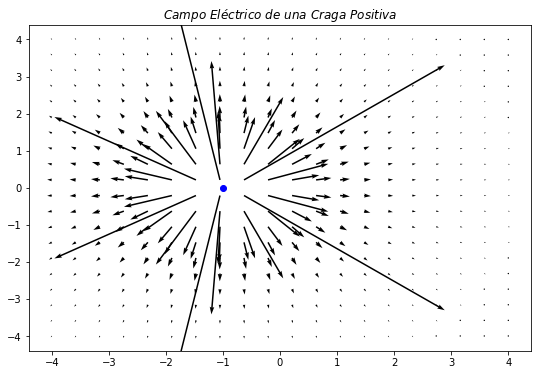

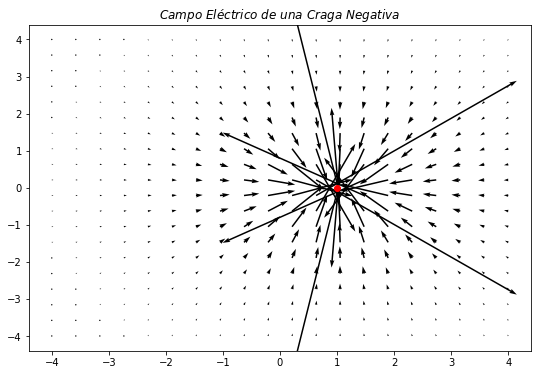

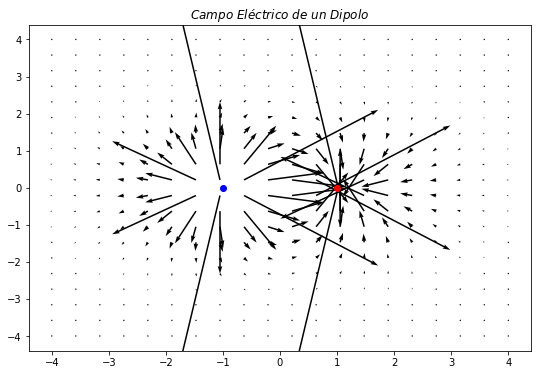

In [14]:
plt.figure(figsize=(9,6))
plt.plot(r_source["q"][0], r_source["q"][1], "bo")
plt.quiver(rp[:,0], rp[:,1], E1[:,0], E1[:,1])
plt.title('$Campo$ $Eléctrico$ $de$ $una$ $Craga$ $Positiva$')

plt.figure(figsize=(9,6))
plt.plot(r_source["-q"][0], r_source["-q"][1], "ro")
plt.quiver(rp[:,0], rp[:,1], E2[:,0], E2[:,1])
plt.title('$Campo$ $Eléctrico$ $de$ $una$ $Craga$ $Negativa$')

plt.figure(figsize=(9,6))
plt.plot(r_source["q"][0], r_source["q"][1], "bo")
plt.plot(r_source["-q"][0], r_source["-q"][1], "ro")
plt.quiver(rp[:,0], rp[:,1], Ex, Ey)
plt.title('$Campo$ $Eléctrico$ $de$ $un$ $Dipolo$')

## 2. Tiro Parabólico

In [15]:
def grad_to_rad(theta):
    rad = (theta*np.pi)/180.
    
    return rad

In [16]:
grad_to_rad(65)

1.1344640137963142

In [19]:
def cesta(x,vo,theta):
    """
    Función que nos dice si el tiro llega al destino.
    
    Input:
    ---------
    x    : Posición del jugador con repecto a la canasta.
    vo   : Velocidad inicial con a¿la que se lanza el balón.
    theta: Ángulo de lanzamiento en grados, 0 < theta < 90°.

    Return:
    ----------
    y    : Nos dice si la pelota entra o no.
    vo   : Si la pelota no antra con los datos ingresados, nos dice cual debe ser vo para que enceste.
    """
    
    H = 3.05                     #Altura de la canasta en metros.
    h = 2.                       #Altura del balón al mometo de lanzar en metros, puede cambiarse. 
    g = 9.80                     #Aceleración de la gravedad m/s**2.
    d = 0.46                     #Diámetro de la canasta.
    
    p = np.array([x,H])          #Posición coordenada de la canasta.
    delta_h = H - h
    y = h + x*np.tan(grad_to_rad(theta)) - (g*x**2)/(2*(vo**2)*(np.cos(grad_to_rad(theta))**2))

    if  round(y,1) == round(p[1],1):
        return ('La pelota entra')
  
    else :
        vo = np.sqrt((g*x**2)/(2*(-delta_h+x*np.tan(grad_to_rad(theta)))*(np.cos(grad_to_rad(theta)))**2))
        return('La pelota no entra.\
         La velocidad inicial debe ser: vo = %.1f m/s ' %vo)

In [23]:
cesta(5,10,30)

'La pelota no entra.         La velocidad inicial debe ser: vo = 9.4 m/s '